## Multiple Linear Regression

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### 1. Importing the libraries


In [1]:
# importing the libraries and warnings
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### 2. Reading the Dataset


In [2]:
# Reading the data in boombikes
boombikes = pd.read_csv("day.csv")

In [3]:
#reading the head of dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2.1 Examining the data set


In [4]:
boombikes.shape

(730, 16)

In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
# Finding out the summary for numerical columns
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### There are 730 rows and 16 columns in dataset with no null values 

### 2.2 Data Cleaning


#### Dropping columns that are not useful for analysis 

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`

In [7]:
boombikes.drop(['instant','casual','registered'], inplace = True, axis = 1)

In [8]:
# creating a new variable to identify the business age in units of days
boombikes['Days_old'] = (pd.to_datetime(boombikes['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
#Validating the data 
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Days_old
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [10]:
# Identifying the features of new updated dataset
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
Days_old      730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 79.9+ KB



### 3. Visualizing and Analyzing the Dataset


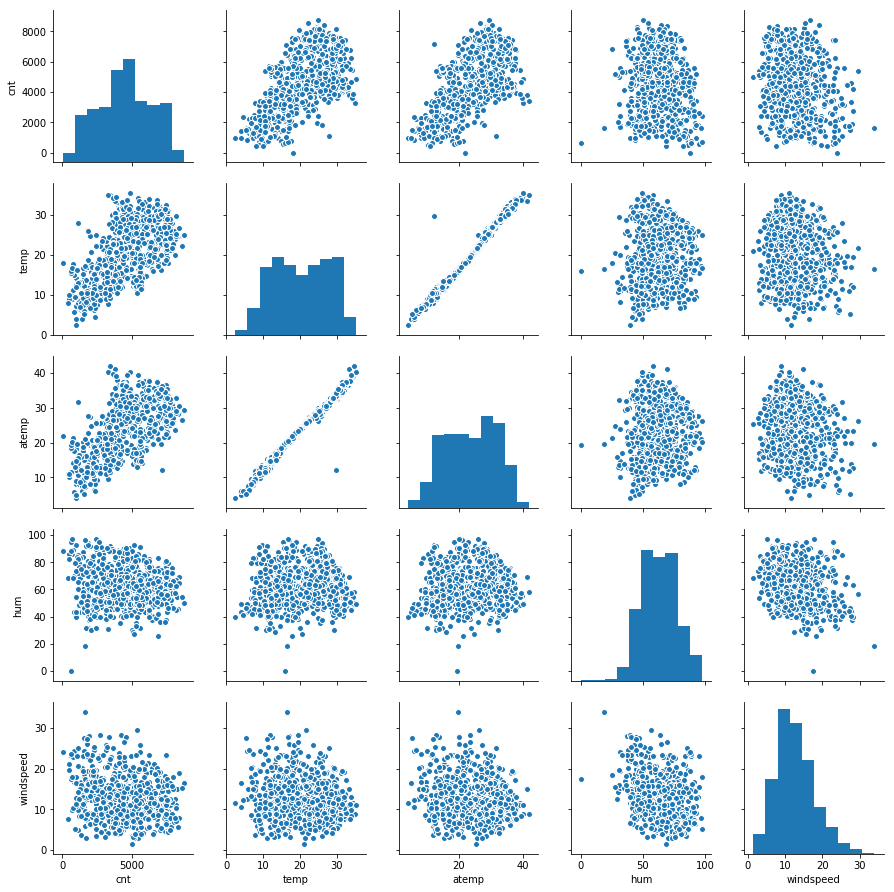

In [11]:
# Analyzing the numerical features using a pairplot
sns.pairplot(data=boombikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()


The numerical variables ‘atemp’ and ‘temp’ variables have the highest correlation with the target variable ‘cnt’. 

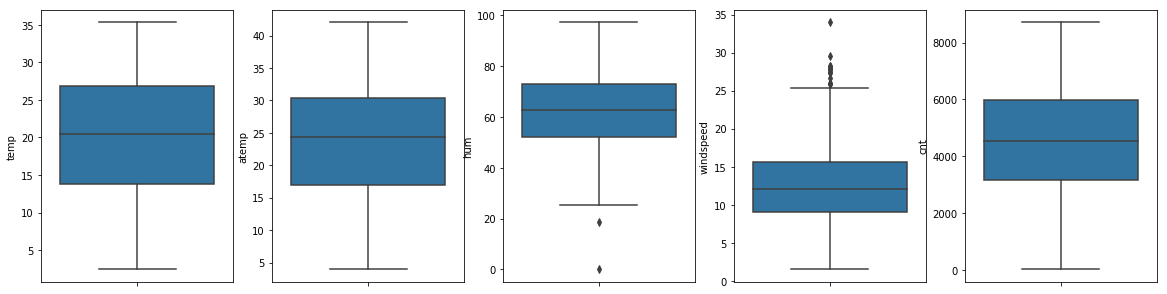

In [12]:
#Plotting box plot to identify the outliers in continuous variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize = (20,5))
for col in num_vars:
    plt.subplot(1,5,num_vars.index(col)+1)
    sns.boxplot( y = col, data = boombikes)

There are no outliers to be handled 

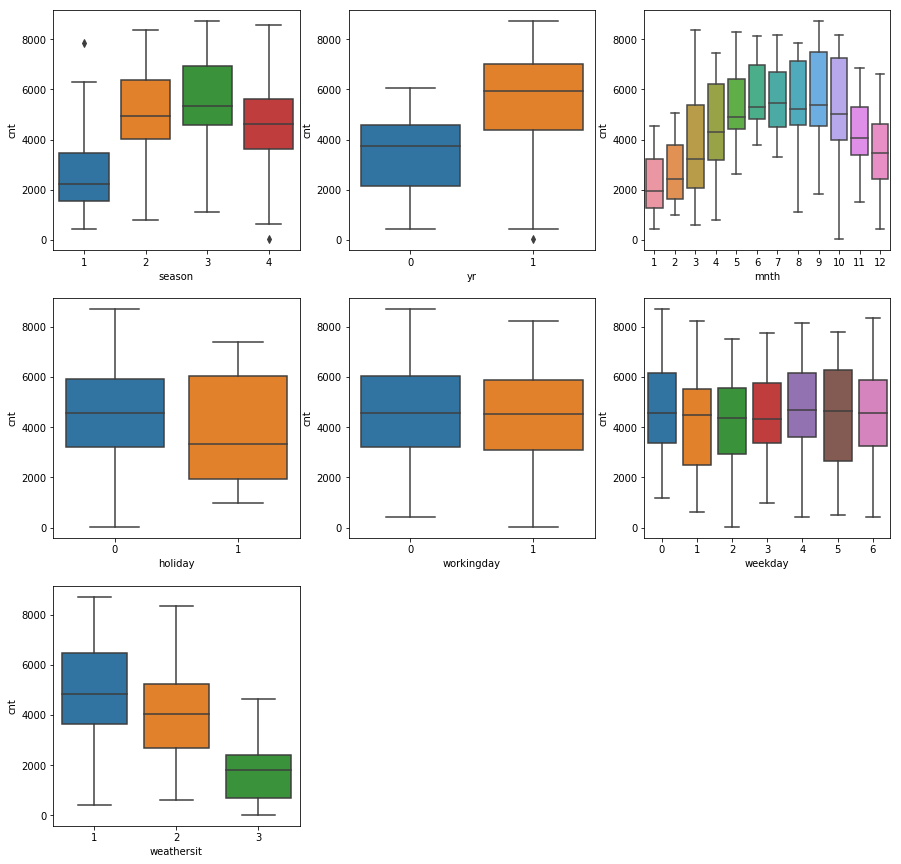

In [13]:
# Categorical Variable Analysis with Target variable 'cnt'
cat_vars = ['season','yr','mnth','holiday','workingday','weekday','weathersit']
plt.figure(figsize = (15,15))
for col in cat_vars:
    plt.subplot(3,3,cat_vars.index(col)+1)
    sns.boxplot(x = col, y = 'cnt', data = boombikes)

- Season: 3: Fall has highest demand for rental bikes and Season 1: Spring has the least demand
- The demand for the bikes has increased in the year 2019
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
- The demand is less on holidays
- Weekdays and Working days are not showing a distinct pattern for demand
- Clear weather has shown higher demand for rental bikes

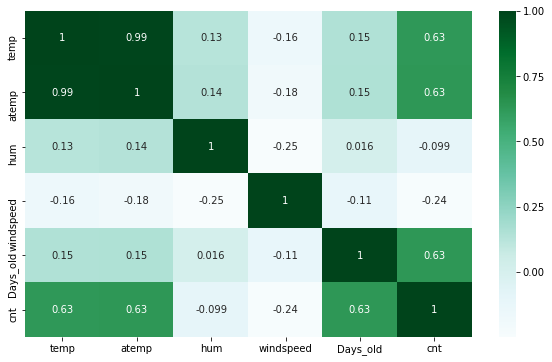

In [14]:
# Finding the correlation between the numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(boombikes[['temp','atemp','hum','windspeed','Days_old','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

- temp, atemp and Days_old have highest correlation with target variable cnt
- temp and atemp are also highly correlated

#### Using the regression plots analysing the patterns of cnt (target variable) with numerical variables


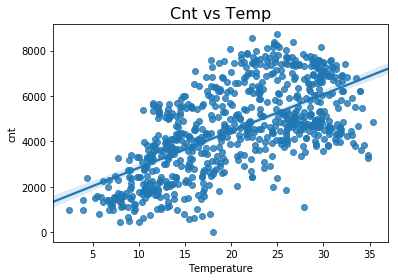

In [15]:
# Analysing the target variable against temperature
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=boombikes,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Inference
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

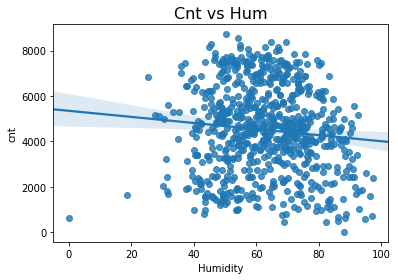

In [16]:
# Analysing the target variable against humidity
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=boombikes,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Inference
- Humidity values are more scattered around, but can see slight decrement in cnt with increment of humidity


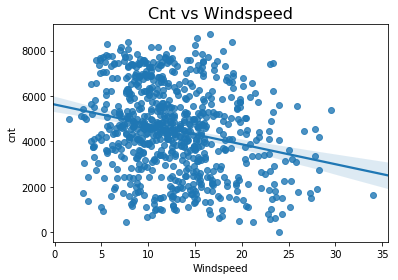

In [17]:
# Analysing the target variable against windspeed
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=boombikes,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

#### Inference
- Windspeed values are more scattered around, but can see decrement in cnt with increment of windspeed


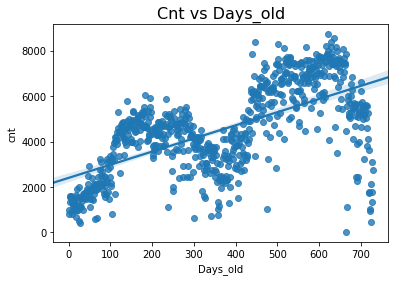

In [18]:
# Analysing the target variable against business age in days
plt.title("Cnt vs Days_old",fontsize=16)
sns.regplot(data=boombikes,y="cnt",x="Days_old")
plt.xlabel("Days_old")
plt.show()

#### Inference
- There is a pattern which shows combined two years the demand is increaing with days_old



### 4. Data Preparation


In [19]:
# Converting numerical data to categorical value for months
import calendar
boombikes['mnth'] = boombikes['mnth'].apply(lambda x: calendar.month_abbr[x])

In [20]:
# Mapping the seasons using data dictionary 
boombikes.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)


In [21]:
# Mapping weather situation using data dictionary
boombikes.weathersit.replace({1:'Clear',2: 'Misty and Cloudy', 3: 'Light snow and rain', 4: 'Heavy snow and rain'}, inplace = True)

In [22]:
# Mapping the days using data dictionary 
boombikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)


In [23]:
# Creating dummy data for categorical variables and dropping first to reduce redundancy
boombikes = pd.get_dummies(data = boombikes, columns = ['season','mnth','weekday'],drop_first = True)


In [24]:
# Creating dummy data for weathersit and not removing first in order to not avoid Heavy snow and rain situation
boombikes = pd.get_dummies(data = boombikes, columns = ['weathersit'])

In [25]:
boombikes.drop(['dteday'], inplace = True, axis = 1)

In [26]:
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Days_old,season_spring,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow and rain,weathersit_Misty and Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light snow and rain', 'weathersit_Misty and Cloudy'],
      dtype='object')

### 5. Model building


#### 5.1 Splitting the dataset

In [28]:
# Splitting the data into training and testing dataset
np.random.seed(0)
boombikes_train, boombikes_test = train_test_split(boombikes, test_size=0.3, random_state=100)

#### 5.2 Rescaling the features

In [29]:
# Rescaling the features of training dataset
# Using min max scaler also known as normalization
scaler = MinMaxScaler()

In [30]:
num_vars = ['temp','atemp','hum','windspeed','Days_old','cnt']

boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars])

In [31]:
boombikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Days_old,season_spring,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow and rain,weathersit_Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
boombikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Days_old,season_spring,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow and rain,weathersit_Misty and Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.514186,0.505822,0.242661,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.626223,0.029354,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.224737,0.288146,0.429112,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.484280,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.256181,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.512363,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.758929,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.3 Dividing the data into X and y

In [33]:
# Divinding the training data in X and y for model building
y_train = boombikes_train.pop('cnt')
X_train = boombikes_train

In [34]:
print(X_train.shape)
print(y_train.shape)

(511, 31)
(511,)


#### 5.4 Linear Model building

In [35]:
# Building a linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Since selecting all features is not efficient so using RFE for feature selection

In [36]:
# Selecting 15 features for model
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Days_old', True, 1),
 ('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 14),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 13),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 15),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light snow and rain', True, 1),
 ('weathersit_Misty and Cloudy', True, 1)]

#### 5.5 Model Optimization

In [38]:
# Function to create model using statsmodel_api
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols]) # adding constant
    lm = sm.OLS(y_train, X_train_lm).fit() # fitting model
    print(lm.summary()) # printing summary
    return lm
    

In [39]:
# Function to calculate VIF 
def cal_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF', ascending = False))
    

In [40]:
# Printing columns supported by RFE 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Days_old',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light snow and rain',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [41]:
# Printing columns not supported by RFE 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_spring', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Model 1

In [42]:
#  Creating model using RFE supported columns
cols = X_train.columns[rfe.support_]

#calling function for model building and VIF calculation
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.02e-190
Time:                        23:27:23   Log-Likelihood:                 513.32
No. Observations:                 511   AIC:                            -996.6
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 2

In [43]:
# Droppin Days_old since it has a very high p-value
cols = X_train.columns[rfe.support_].drop('Days_old')

In [44]:
# Creating new model using optimized columns
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.11e-191
Time:                        23:27:24   Log-Likelihood:                 513.25
No. Observations:                 511   AIC:                            -998.5
Df Residuals:                     497   BIC:                            -939.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

month_Jan has a very high p value greater than 0.05 so dropping that

#### Model 3

In [45]:
# Droppin mnth_Jan since it has a very high p-value
cols = cols.drop('mnth_Jan')

In [46]:
# creating a new model 
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.01e-191
Time:                        23:27:27   Log-Likelihood:                 510.69
No. Observations:                 511   AIC:                            -995.4
Df Residuals:                     498   BIC:                            -940.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Dropping column weathersit_Clear since the p values of columns are less than .05

#### Model 4

In [47]:
# Dropping weathersit_Clear since it has a very high VIF
cols = cols.drop('weathersit_Clear')

In [48]:
# Creating model using new set of columns
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.01e-191
Time:                        23:27:28   Log-Likelihood:                 510.69
No. Observations:                 511   AIC:                            -995.4
Df Residuals:                     498   BIC:                            -940.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Dropping humidity(hum) column because of high VIF value

#### Model 5

In [49]:
# Dropping hum since it has a very high VIF
cols = cols.drop('hum')

In [50]:
# Creating model using new set of columns
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.87e-187
Time:                        23:27:30   Log-Likelihood:                 498.72
No. Observations:                 511   AIC:                            -973.4
Df Residuals:                     499   BIC:                            -922.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Dropping month of Oct for its high p value

#### Model 6

In [51]:
# Dropping mnth_Oct since it has a p value greater than .05
cols = cols.drop('mnth_Oct')

In [52]:
# Creating model using new set of columns
build_model(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.10e-187
Time:                        23:27:33   Log-Likelihood:                 496.84
No. Observations:                 511   AIC:                            -971.7
Df Residuals:                     500   BIC:                            -925.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Now as, the VIFs and p-values both are within an acceptable range. So making our predictions using this model only.

### 6. Residual Analysis of the train data


In [53]:
# printing the columns of final model
X_train_lr = X_train[cols].columns

In [54]:
# Building final model lr_final using above columns
lr_final = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.10e-187
Time:                        23:27:35   Log-Likelihood:                 496.84
No. Observations:                 511   AIC:                            -971.7
Df Residuals:                     500   BIC:                            -925.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [55]:
# creating lm model using same lr_final model for predictions 
lm = LinearRegression()
lm.fit(X_train[cols],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# printing all variables coefficients 
lm.coef_

array([ 0.23311437, -0.0970644 ,  0.51767277, -0.14958671,  0.10113753,
        0.13829062,  0.05393988,  0.11599063, -0.28257995, -0.08159916])

In [57]:
#printing intercept of model
lm.intercept_

0.1304622229548602

In [58]:
y_train_pred = lm.predict(X_train[cols])

Text(0.5,0,'Errors')

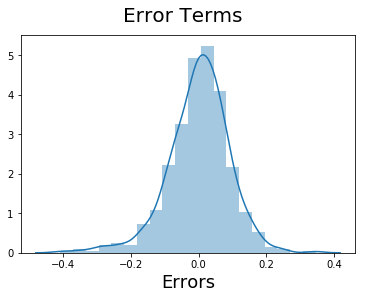

In [59]:
#Plotting histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Errors are normally distributed with mean equals to 0. Hence making predictions using this

In [60]:
#Calculating R-squared value for training data set
r2_train = r2_score(y_train,y_train_pred)
print(r2_train)

0.8338445751661243


In [61]:
#Calculating adjusted R-squared value for training dataset

n_train = X_train.shape[0]
p_train = X_train[cols].shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
print(adjusted_r2_train)

0.8305214666694468


#### Inference
R2 score is same as obtained for final model

### 7. Making Predictions Using the Final Model



In [62]:
# Rescaling the features for test data and scaling that
num_vars = ['temp','atemp','hum','windspeed','Days_old','cnt']

boombikes_test[num_vars] = scaler.fit_transform(boombikes_test[num_vars])

In [63]:
# Dividing into X and y
y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [64]:
# printing the shapes of X and y 
print(X_test.shape)
print(y_test.shape)

(219, 31)
(219,)


In [65]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Days_old,season_spring,season_summer,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow and rain,weathersit_Misty and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.485918,0.255708,0.264840,...,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.294305,0.437258,0.442259,...,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.230028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.475207,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.734848,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_test.describe()

count    219.000000
mean       0.516216
std        0.238702
min        0.000000
25%        0.359882
50%        0.520241
75%        0.682487
max        1.000000
Name: cnt, dtype: float64

In [67]:
X_test_lr = X_test[cols]
X_test_lr.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Sep', 'weathersit_Light snow and rain',
       'weathersit_Misty and Cloudy'],
      dtype='object')

#### Predicting values for test data

In [68]:
#Predicting the y_test using final model lm
y_test_pred = lm.predict(X_test[cols])

#### R-sqaure value for test predictions

In [69]:
#Calculating R-square value for test dataset
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)


0.7847777083536653


In [70]:
#Calculating adjusted R-squared value for training dataset

n_test = X_test.shape[0]
p_test = X_test[cols].shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print(adjusted_r2_test)

0.7744304827937454


#### Inference 
R2 square is almost same as for final model. The R-score value for our final is high and good as on test data as well it is providing almost same R square value

### 7. Model Evaluation

Text(0,0.5,'y_test_pred')

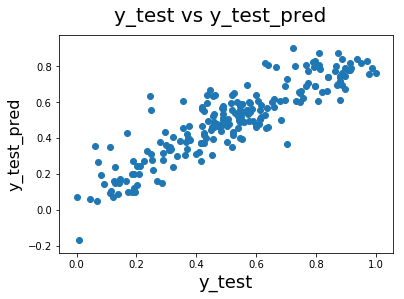

In [71]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [72]:
parameters = pd.DataFrame(lr_final.params)
parameters.rename(columns = {0:'Coefficient value'},inplace = True)
parameters.sort_values(by = 'Coefficient value',ascending = False,inplace = True)


In [73]:
parameters

,Coefficient value
temp,0.517673
yr,0.233114
season_winter,0.138291
const,0.130462
mnth_Sep,0.115991
season_summer,0.101138
mnth_Aug,0.053940
weathersit_Misty and Cloudy,-0.081599
holiday,-0.097064
windspeed,-0.149587


#### The best fitted line for our final model is:
cnt = 0.130462 + 0.517673*temp + 0.233114*yr + 0.138291*season_winter + 0.115991*mnth_Sep + 0.101138*season_summer + 0.053940*mnth_Aug - 0.081599*(weathersit_Misty and Cloudy) - 0.097064*holiday - 0.149587*windspeed - 0.282580*weathersit_Light snow and rain	
 

### 8. Final Result Comparison

- Train R^2 :0.834
- Train Adjusted R^2 :0.831
- Test R^2 :0.785
- Test Adjusted R^2 :0.774
This seems to be a really good model that can very well 'Generalize' various datasets.



### 9. Conclusion

The top 3 predictor variables that influences the bike booking are:
1. Temperature (temp) - A coefficient value of ‘0.517673’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.517673 units.
2. Weather (weathersit_Light snow and rain) - A coefficient value of ‘-0.282580’ indicated that, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.282580 units.
3. Year (yr) - A coefficient value of ‘0.233114’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.233114 units.


